In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



In [21]:
pd.read_csv('datadump_s5-000.csv')

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,...,Vertical,None,Compensator,5.7_USG,Pistols,None,None,None,None,IMPACT_GRENADE
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,...,None,None,None,MK1_9mm,Pistols,None,None,None,None,DEPLOYABLE_SHIELD
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,None,None,MuzzleBrake,PRB92,Pistols,None,None,None,None,IMPACT_GRENADE
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,20170221,PS4,HOSTAGE,BANK,1368316041,6,STAFF_ROOM,Defender,AttackersEliminated,158,...,Vertical,None,None,BEARING_9,Submachine_Guns,RedDot,None,None,None,CLAYMORE
3999996,20170221,PS4,HOSTAGE,BANK,1368316041,2,VAULT,Attacker,DefendersEliminated,170,...,Vertical,None,None,BEARING_9,Submachine_Guns,RedDot,None,None,None,CLAYMORE
3999997,20170221,PS4,HOSTAGE,BANK,1368316041,1,VAULT,Attacker,DefendersEliminated,142,...,Vertical,None,MuzzleBrake,M45_MEUSOC,Pistols,None,None,Laser,Suppressor,SMOKE_GRENADE
3999998,20170221,PS4,HOSTAGE,BANK,1368316041,4,VAULT,Defender,AttackersEliminated,156,...,Vertical,None,Compensator,P9,Pistols,None,None,None,None,BREACH_CHARGE


In [22]:
df = pd.read_csv('datadump_s5-000.csv')
df = df.drop(['roundduration','clearancelevel','skillrank','role','team','haswon','nbkills','isdead','primaryweapon','primaryweapontype','primarysight','primarygrip','primaryunderbarrel','primarybarrel','secondaryweapon','secondaryweapontype','secondarysight','secondarygrip','secondaryunderbarrel','secondarybarrel','secondarygadget','platform','matchid'], axis=1, errors='ignore')
df.head()

,dateid,gamemode,mapname,roundnumber,objectivelocation,winrole,endroundreason,operator
0,20170212,HOSTAGE,CLUB_HOUSE,1,STRIP_CLUB,Defender,AttackersKilledHostage,SWAT-CASTLE
1,20170212,HOSTAGE,CLUB_HOUSE,4,CHURCH,Defender,AttackersEliminated,GSG9-JAGER
2,20170212,HOSTAGE,CLUB_HOUSE,3,CHURCH,Defender,AttackersEliminated,JTF2-FROST
3,20170212,HOSTAGE,CLUB_HOUSE,4,CHURCH,Defender,AttackersEliminated,BOPE-CAVEIRA
4,20170212,HOSTAGE,CLUB_HOUSE,6,BEDROOM,Attacker,DefendersEliminated,GSG9-JAGER


In [25]:
label_encoder = LabelEncoder()
df['gamemode'] = label_encoder.fit_transform(df['gamemode'])
df['mapname'] = label_encoder.fit_transform(df['mapname'])
df['winrole'] = label_encoder.fit_transform(df['winrole'])
df['objectivelocation'] = label_encoder.fit_transform(df['objectivelocation'])

In [26]:
X = df[['gamemode', 'mapname', 'winrole','objectivelocation']]
y = df['operator']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf_classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.06712
                     precision    recall  f1-score   support

       BOPE-CAPITAO       0.00      0.00      0.00     14150
       BOPE-CAVEIRA       0.03      0.00      0.00     32580
      G.E.O.-JACKAL       0.05      0.00      0.00     41029
        G.E.O.-MIRA       0.00      0.00      0.00     35066
           GIGN-DOC       0.00      0.00      0.00     22512
      GIGN-MONTAGNE       0.00      0.00      0.00     12925
       GIGN-RESERVE       0.00      0.00      0.00      1298
          GIGN-ROOK       0.00      0.00      0.00     28680
        GIGN-TWITCH       0.04      0.00      0.00     40648
        GSG9-BANDIT       0.07      0.05      0.06     38005
         GSG9-BLITZ       0.00      0.00      0.00      4527
            GSG9-IQ       0.00      0.00      0.00     12989
         GSG9-JAGER       0.07      0.64      0.12     52913
       GSG9-RESERVE       0.00      0.00      0.00      3978
          JTF2-BUCK       0.00      0.00      0.00     18768
     

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt

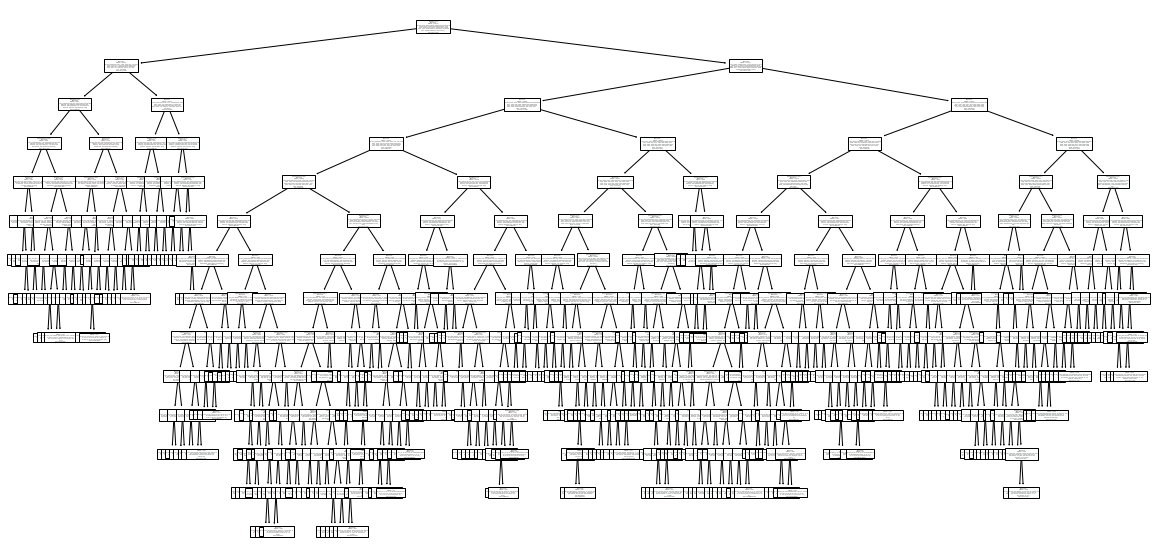

In [32]:
plt.figure(figsize=(20, 10))
tree.plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=rf_classifier.classes_, filled=True)
plt.show()